In [33]:
import time
import re

import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

from matplotlib import pyplot as plt

2.2.0-rc4


In [0]:
# Read the Divina Commedia
import requests
url = "https://raw.githubusercontent.com/DanieleVeri/deep_comedy/master/divina_commedia.txt"
response = requests.get(url)

divina_commedia = response.text

# Replace rare characters
divina_commedia = divina_commedia.replace("ä", "a")
divina_commedia = divina_commedia.replace("é", "è")
divina_commedia = divina_commedia.replace("ë", "è")
divina_commedia = divina_commedia.replace("Ë", "E")
divina_commedia = divina_commedia.replace("ï", "i")
divina_commedia = divina_commedia.replace("Ï", "I")
divina_commedia = divina_commedia.replace("ó", "ò")
divina_commedia = divina_commedia.replace("ö", "o")
divina_commedia = divina_commedia.replace("ü", "u")

divina_commedia = divina_commedia.replace("(", "-")
divina_commedia = divina_commedia.replace(")", "-")
divina_commedia = divina_commedia.replace("[", "")
divina_commedia = divina_commedia.replace("]", "")

divina_commedia = re.sub(r'[0-9]+', '', divina_commedia)
divina_commedia = divina_commedia.replace(" \n", "\n")

In [35]:
# Check lenght of text
print(len(divina_commedia))

537023


In [0]:
# Store unique characters into a dict with numerical encoding
unique_chars = list(set(divina_commedia))
unique_chars.sort()  # to make sure you get the same encoding at each run

# Store them in a dict, associated with a numerical index
char2idx = { char[1]: char[0] for char in enumerate(unique_chars) }


In [37]:
print(len(char2idx))

63


In [38]:
char2idx

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 "'": 4,
 ',': 5,
 '-': 6,
 '.': 7,
 ':': 8,
 ';': 9,
 '?': 10,
 'A': 11,
 'B': 12,
 'C': 13,
 'D': 14,
 'E': 15,
 'F': 16,
 'G': 17,
 'H': 18,
 'I': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'X': 31,
 'Z': 32,
 'a': 33,
 'b': 34,
 'c': 35,
 'd': 36,
 'e': 37,
 'f': 38,
 'g': 39,
 'h': 40,
 'i': 41,
 'j': 42,
 'l': 43,
 'm': 44,
 'n': 45,
 'o': 46,
 'p': 47,
 'q': 48,
 'r': 49,
 's': 50,
 't': 51,
 'u': 52,
 'v': 53,
 'x': 54,
 'y': 55,
 'z': 56,
 '~': 57,
 'à': 58,
 'è': 59,
 'ì': 60,
 'ò': 61,
 'ù': 62}

In [0]:
def numerical_encoding(text, char_dict):
    """ Text to list of chars, to np.array of numerical idx """
    chars_list = [ char for char in text ]
    chars_list = [ char_dict[char] for char in chars_list ]
    chars_list = np.array(chars_list)
    return chars_list


In [40]:
# Let's see what the first line will look like
print("{}".format(divina_commedia[276:311]))
print("\nbecomes:")
print(numerical_encoding(divina_commedia[276:311], char2idx))

ura!
  Tant'è amara che poco è più 

becomes:
[52 49 33  2  0  1  1 28 33 45 51  4 59  1 33 44 33 49 33  1 35 40 37  1
 47 46 35 46  1 59  1 47 41 62  1]


In [0]:
# Apply it on the whole Comedy
encoded_text = numerical_encoding(divina_commedia, char2idx)

In [0]:
def get_text_matrix(sequence, len_input):
    
    # create empty matrix
    X = np.empty((len(sequence)-len_input, len_input))
    
    # fill each row/time window from input sequence
    for i in range(X.shape[0]):
        X[i,:] = sequence[i : i+len_input]
        
    return X

In [0]:
text_matrix = get_text_matrix(encoded_text, 100)

In [44]:
print(text_matrix.shape)

(536923, 100)


In [45]:
print("100th train sequence:\n")
print(text_matrix[ 100, : ])
print("\n\n100th target sequence:\n")
print(text_matrix[ 101, : ])

100th train sequence:

[53. 41. 51. 33.  0. 44. 41.  1. 49. 41. 51. 49. 46. 53. 33. 41.  1. 47.
 37. 49.  1. 52. 45. 33.  1. 50. 37. 43. 53. 33.  1. 46. 50. 35. 52. 49.
 33.  0. 35. 40. 59.  1. 43. 33.  1. 36. 41. 49. 41. 51. 51. 33.  1. 53.
 41. 33.  1. 37. 49. 33.  1. 50. 44. 33. 49. 49. 41. 51. 33.  7.  0.  1.
  1. 11. 40. 41.  1. 48. 52. 33. 45. 51. 46.  1. 33.  1. 36. 41. 49.  1.
 48. 52. 33. 43.  1. 37. 49. 33.  1. 59.]


100th target sequence:

[41. 51. 33.  0. 44. 41.  1. 49. 41. 51. 49. 46. 53. 33. 41.  1. 47. 37.
 49.  1. 52. 45. 33.  1. 50. 37. 43. 53. 33.  1. 46. 50. 35. 52. 49. 33.
  0. 35. 40. 59.  1. 43. 33.  1. 36. 41. 49. 41. 51. 51. 33.  1. 53. 41.
 33.  1. 37. 49. 33.  1. 50. 44. 33. 49. 49. 41. 51. 33.  7.  0.  1.  1.
 11. 40. 41.  1. 48. 52. 33. 45. 51. 46.  1. 33.  1. 36. 41. 49.  1. 48.
 52. 33. 43.  1. 37. 49. 33.  1. 59.  1.]


In [0]:
# size of vocabulary
vocab_size = len(char2idx)

# size of mini batches during training
batch_size = 100

# size of training subset at each epoch
subset_size = batch_size * 100

# vector size of char embeddings
embedding_size = 250

len_input = 1000   # 200

hidden_size = 250  # for Dense() layers

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.activations import elu, relu, softmax

In [48]:
RNN = Sequential([
    Embedding(vocab_size, embedding_size,
              batch_input_shape=(batch_size, None)),
    
    LSTM(len_input, return_sequences = True),
    
    Dense(hidden_size, activation = relu), 
    
    Dense(vocab_size)
])

RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (100, None, 250)          15750     
_________________________________________________________________
lstm_2 (LSTM)                (100, None, 1000)         5004000   
_________________________________________________________________
dense_4 (Dense)              (100, None, 250)          250250    
_________________________________________________________________
dense_5 (Dense)              (100, None, 63)           15813     
Total params: 5,285,813
Trainable params: 5,285,813
Non-trainable params: 0
_________________________________________________________________


In [0]:
n_epochs = 10

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

In [0]:
# This is an Autograph function
# its decorator makes it a TF op - i.e. much faster
@tf.function
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        current_loss = tf.reduce_mean(
            tf.keras.losses.sparse_categorical_crossentropy(
                y, RNN(x), from_logits = True))
    gradients = tape.gradient(current_loss, RNN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, RNN.trainable_variables))
    return current_loss

In [51]:
loss_history = []

for epoch in range(n_epochs):
    start = time.time()
    print(epoch)
    # Take subsets of train and target
    sample = np.random.randint(0, text_matrix.shape[0]-1, subset_size)
    sample_train = text_matrix[ sample , : ]
    sample_target = text_matrix[ sample+1 , : ]
    
    for iteration in range(sample_train.shape[0] // batch_size):
        take = iteration * batch_size
        x = sample_train[ take:take+batch_size , : ]
        y = sample_target[ take:take+batch_size , : ]

        current_loss = train_on_batch(x, y)
        loss_history.append(current_loss)
    
    print("{}.  \t  Loss: {}  \t  Time: {}ss".format(
        epoch+1, current_loss.numpy(), round(time.time()-start, 2)))

0
1.  	  Loss: 3.063734292984009  	  Time: 9.22ss
1
2.  	  Loss: 2.945369243621826  	  Time: 7.61ss
2
3.  	  Loss: 2.6483139991760254  	  Time: 7.53ss
3
4.  	  Loss: 2.4748597145080566  	  Time: 7.52ss
4
5.  	  Loss: 2.393888473510742  	  Time: 7.54ss
5
6.  	  Loss: 2.320936441421509  	  Time: 7.54ss
6
7.  	  Loss: 2.227619171142578  	  Time: 7.55ss
7
8.  	  Loss: 2.2035419940948486  	  Time: 7.54ss
8
9.  	  Loss: 2.1737520694732666  	  Time: 7.55ss
9
10.  	  Loss: 2.107570171356201  	  Time: 7.57ss


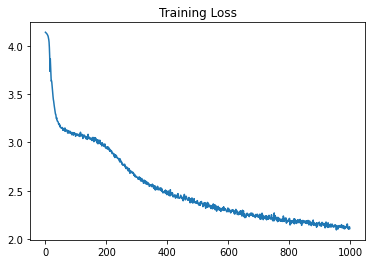

In [52]:
plt.plot(loss_history)
plt.title("Training Loss")
plt.show()

In [0]:
RNN.save("/text_generator_RNN_00.h5")

In [54]:
generator = Sequential([
    Embedding(vocab_size, embedding_size,
              batch_input_shape=(1, None)),
    
    LSTM(len_input, return_sequences = True, stateful=True),
    
    Dense(hidden_size, activation = relu), 
    
    Dense(vocab_size)
])

generator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 250)            15750     
_________________________________________________________________
lstm_3 (LSTM)                (1, None, 1000)           5004000   
_________________________________________________________________
dense_6 (Dense)              (1, None, 250)            250250    
_________________________________________________________________
dense_7 (Dense)              (1, None, 63)             15813     
Total params: 5,285,813
Trainable params: 5,285,813
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Import trained weights from RNN to generator
generator.set_weights(RNN.get_weights())

In [57]:
def generate_text(start_string, num_generate = 1000, temperature = 1.0):
    
    # Vectorize input string
    input_eval = [char2idx[s] for s in start_string]  
    input_eval = tf.expand_dims(input_eval, 0)
    
    text_generated = [] # List to append predicted chars 
    
    idx2char = { v: k for k, v in char2idx.items() }  # invert char-index mapping
    
    generator.reset_states()
    
    for i in range(num_generate):
        predictions = generator(input_eval)
        predictions = tf.squeeze(predictions, 0)
        
        # sample next char based on distribution and temperature
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])
        
    return (start_string + ''.join(text_generated))

init="""
Nel mezzo del cammin di nostra vita
mi ritrovai per una selva oscura,
chè la diritta via era smarrita.
"""
print(generate_text(init))



Nel mezzo del cammin di nostra vita
mi ritrovai per una selva oscura,
chè la diritta via era smarrita.
  Quul bua pia iu dissetsa la lo lar.
  Ana pasgia di sì con che voòttarse
per comarti da cretante perto
didi
querta gimpea pere sunarera per'ndo.
  mer l'amle di arno d'siol i quante suosri.
  On pieco"lo ì D'anno, a pino chò de pisme
mi sel a stia el quale piailartò smiersra.
  Li sosceldlri er econi matnandi carpiando
di sizi mi'ue l'elo alatri quormo,
 i lo soce palta peBangurozzo ni:
sorterdettra fatbe piel al banto
pie late cogil gàlla padro e pretanza
lon ostuo te guntro,  luò nondio nontro
l sentpara favie lan fati eu srastimi
che l' tonttaa seuna i verle de l'lapa di poima veragari, perlte un to anpita
li suri i sossopere gral'ali chinorto
pandan eval guista no quel lu tarne.
 "Ota, piiminno annini dimo quen dolte cTeso
di per mion dissa.
  Diono liotsta matarno.
  "vi poice dancha  me li li sistuvi.
  do ti suadi letardo cove:  Dimer chi omve sì chii fit'ame chè dievo, tè f